# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## My Analysis

- As anticipatded, the weather gets warmer as the latitude is approaching the ecuator (0 degrees). Is interesting to note that in the south hemisphere as the latitude increases the temperature gets colder droping to the low twenties, however the change is steeper in the north hemisphere where the lowest temperature reaches below zero.
-  Latitude and Humidity does not seem to be related
-  The latitude and percent of cloudiness do not show a relationship. However, we can see that a substantial number of cities have a cloudiness percent siting at 0, 20, 40 and 90%.
-  No evident relation seems to exist between latitude and wind speed. Most cities have a percent of wind speed between 0 and 15 %.






In [51]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Import API key
from api_keys import api_key


# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

#Get weather data
print("Beginning Data Retrival")
print("------------------------------")
record = 1
set = 1
# create a list to hold response info
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

for city in cities:
    response = requests.get(f"{url}&q={city}").json()
        
    try:
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} of Set{set} | {city_record}")
               
        # Increase counter by one 
        record= record + 1
        set = set +1       
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue
print("-------------------------")
print("Data Retrieval Complete")
print("-------------------------")
         

Beginning Data Retrival
------------------------------
Processing Record 1 of Set1 | Provideniya
Processing Record 2 of Set2 | New Norfolk
Processing Record 3 of Set3 | Busselton
Processing Record 4 of Set4 | Kapaa
Processing Record 5 of Set5 | Salamiyah
Processing Record 6 of Set6 | Albany
Processing Record 7 of Set7 | Tabuk
Processing Record 8 of Set8 | Nizza Monferrato
Processing Record 9 of Set9 | Thompson
Processing Record 10 of Set10 | Am Timan
Processing Record 11 of Set11 | Victoria
Processing Record 12 of Set12 | Coquimbo
Processing Record 13 of Set13 | Arraial do Cabo
Processing Record 14 of Set14 | Rocha
Processing Record 15 of Set15 | Kharan
Processing Record 16 of Set16 | Fortuna
Processing Record 17 of Set17 | Ribeira Grande
Processing Record 18 of Set18 | Sao Filipe
City not found. Skipping...
Processing Record 19 of Set19 | Sungairaya
Processing Record 20 of Set20 | Rikitea
Processing Record 21 of Set21 | Vagay
Processing Record 22 of Set22 | Puerto Ayora
Processing Rec

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create a data frame from dictionary 
weather_lists = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

weather_df.count()  

City          554
Cloudiness    554
Country       554
Date          554
Humidity      554
Lat           554
Lng           554
Max Temp      554
Wind Speed    554
dtype: int64

In [9]:
weather_df = pd.DataFrame(weather_lists)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Provideniya,0,RU,1554664659,100,64.42,-173.23,14.69,25.08
1,New Norfolk,40,AU,1554664876,76,-42.78,147.06,48.20,5.82
2,Busselton,0,AU,1554664812,59,-33.64,115.35,52.00,11.88
3,Kapaa,40,US,1554664523,73,22.08,-159.32,75.00,8.05
4,Salamiyah,44,SY,1554664917,80,35.01,37.05,56.45,4.16


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

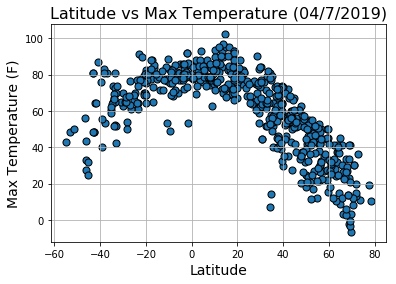

In [40]:
plt.scatter( x= weather_df["Lat"], y= weather_df["Max Temp"], marker="o", s=50,edgecolor="black")
plt.title("Latitude vs Max Temperature (04/7/2019)",fontsize=16)
plt.xlabel("Latitude",fontsize=14)
plt.ylabel ("Max Temperature (F)",fontsize=14)
plt.grid(True) 


plt.savefig('Latitude-Temp plot.svg', format='svg', dpi=1200)
plt.show()


#### Latitude vs. Humidity Plot

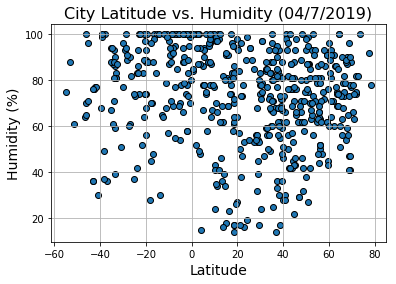

In [46]:
x = weather_df["Lat"]
y = weather_df["Humidity"]


plt.scatter(x, y, marker='o', edgecolors="black")
plt.title("City Latitude vs. Humidity (04/7/2019)",fontsize=16)
plt.xlabel("Latitude",fontsize=14)
plt.ylabel("Humidity (%)",fontsize=14)
plt.grid(True)
plt.savefig('Latitude-Humidity plot.svg', format='svg', dpi=1200)
plt.show()

#### Latitude vs. Cloudiness Plot

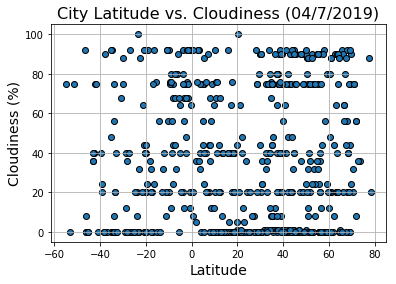

In [47]:
x = weather_df["Lat"]
y = weather_df["Cloudiness"]


plt.scatter(x, y, marker='o', edgecolors="black")
plt.title("City Latitude vs. Cloudiness (04/7/2019)",fontsize=16)
plt.xlabel("Latitude",fontsize=14)
plt.ylabel("Cloudiness (%)",fontsize=14)
plt.grid(True)
plt.savefig('Latitude-Cloundiness plot.svg', format='svg', dpi=1200)
plt.show()

#### Latitude vs. Wind Speed Plot

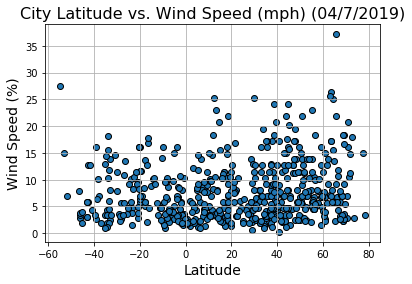

In [48]:
x = weather_df["Lat"]
y = weather_df["Wind Speed"]


plt.scatter(x, y, marker='o', edgecolors="black")
plt.title("City Latitude vs. Wind Speed (mph) (04/7/2019)",fontsize=16)
plt.xlabel("Latitude",fontsize=14)
plt.ylabel("Wind Speed (%)",fontsize=14)
plt.grid(True)
plt.savefig('Latitude-Wind Speed plot.svg', format='svg', dpi=1200)
plt.show()